# Analysis of the Quoted Product using Anaconda Python

The objective of this analysis is: 
* Determing which manufacturers product the dealership was selling the Most.
* Which parts catagories were more likely to be specified.

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from __future__ import division

plt.style.use('seaborn-dark-palette')
#%matplotlib inline
#pd.set_option('display.max_columns', 89)

df = pd.read_csv('Data/CustomerQuotedProduct_clean.csv', encoding='Latin-1')

In [39]:
df.head()

,fldOrderNumber,fldQuoteNumber,fldQuantity,fldDate,fldPartNumber,fldManufacturer_ID,fldFurnitureSystemID,fldGroupTypeID,fldOpsWorksheetID,fldDescription
0,85306,85306 WS,8,2020-02-20,NaN,Clarus,NaN,Accessories,NaN,FLOAT GLASSBOARD- MARKER BOARD - TEMPERED SAFE...
1,85306,85306 WS,3,2020-02-20,NaN,Clarus,NaN,Accessories,NaN,FLOAT GLASSBOARD- MARKER BOARD - TEMPERED SAFE...
2,85306,85306 WS,2,2020-02-20,NaN,Clarus,NaN,Accessories,NaN,"GO!MOBILE - MOBILE WHITE BOARD 40"" X 54""; 5/32..."
3,52604,52606,1,2016-05-17,NaN,Watson,NaN,Accessories,Lights,Watson Freight
4,51013,51283b,6,2016-03-29,NaN,Herman Miller,NaN,Accessories,Lights,Momentum Textiles:Velocity


In [40]:
df1 = df[['fldDate', 'fldQuantity', 'fldManufacturer_ID', 'fldGroupTypeID', 'fldOpsWorksheetID']]
df1.head()

,fldDate,fldQuantity,fldManufacturer_ID,fldGroupTypeID,fldOpsWorksheetID
0,2020-02-20,8,Clarus,Accessories,NaN
1,2020-02-20,3,Clarus,Accessories,NaN
2,2020-02-20,2,Clarus,Accessories,NaN
3,2016-05-17,1,Watson,Accessories,Lights
4,2016-03-29,6,Herman Miller,Accessories,Lights


In [41]:
StartDate = '2016-01-01'
EndDate = '2017-01-01'
df2 = df1.loc[(df1['fldDate'] >= StartDate) & (df1['fldDate'] < EndDate)]
df2.head()

,fldDate,fldQuantity,fldManufacturer_ID,fldGroupTypeID,fldOpsWorksheetID
3,2016-05-17,1,Watson,Accessories,Lights
4,2016-03-29,6,Herman Miller,Accessories,Lights
5,2016-03-29,16,Herman Miller,Accessories,Lights
6,2016-08-02,1,Various,Accessories,Lights
7,2016-08-16,1,Various,Accessories,Lights


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219 entries, 3 to 34487
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fldDate             5219 non-null   object
 1   fldQuantity         5219 non-null   int64 
 2   fldManufacturer_ID  5218 non-null   object
 3   fldGroupTypeID      5202 non-null   object
 4   fldOpsWorksheetID   5203 non-null   object
dtypes: int64(1), object(4)
memory usage: 244.6+ KB


#### These are the General Furniture Catagories that were quoted with the OHMS Calculator.

Text(0.5, 0, 'Furniture Catagories Quoted')

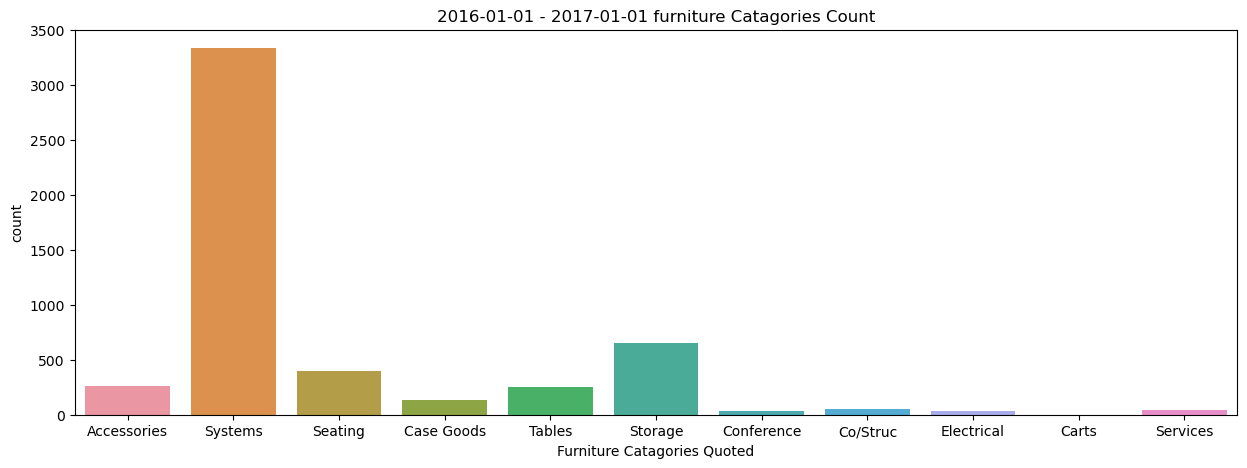

In [43]:
StartDate = '2016-01-01'
EndDate = '2017-01-01'
df2 = df1.loc[(df1['fldDate'] >= StartDate) & (df1['fldDate'] < EndDate)]
plt.figure(figsize = (15,5))
sns.countplot(x='fldGroupTypeID', data=df2)
plt.title(f'{StartDate} - {EndDate} furniture Catagories Count')
plt.xlabel('Furniture Catagories Quoted')

#### The chart below shows the number of lines that were specified of each part catagory. This is not the quantity of peices that were specified.

Text(0.5, 0, 'count of entries')

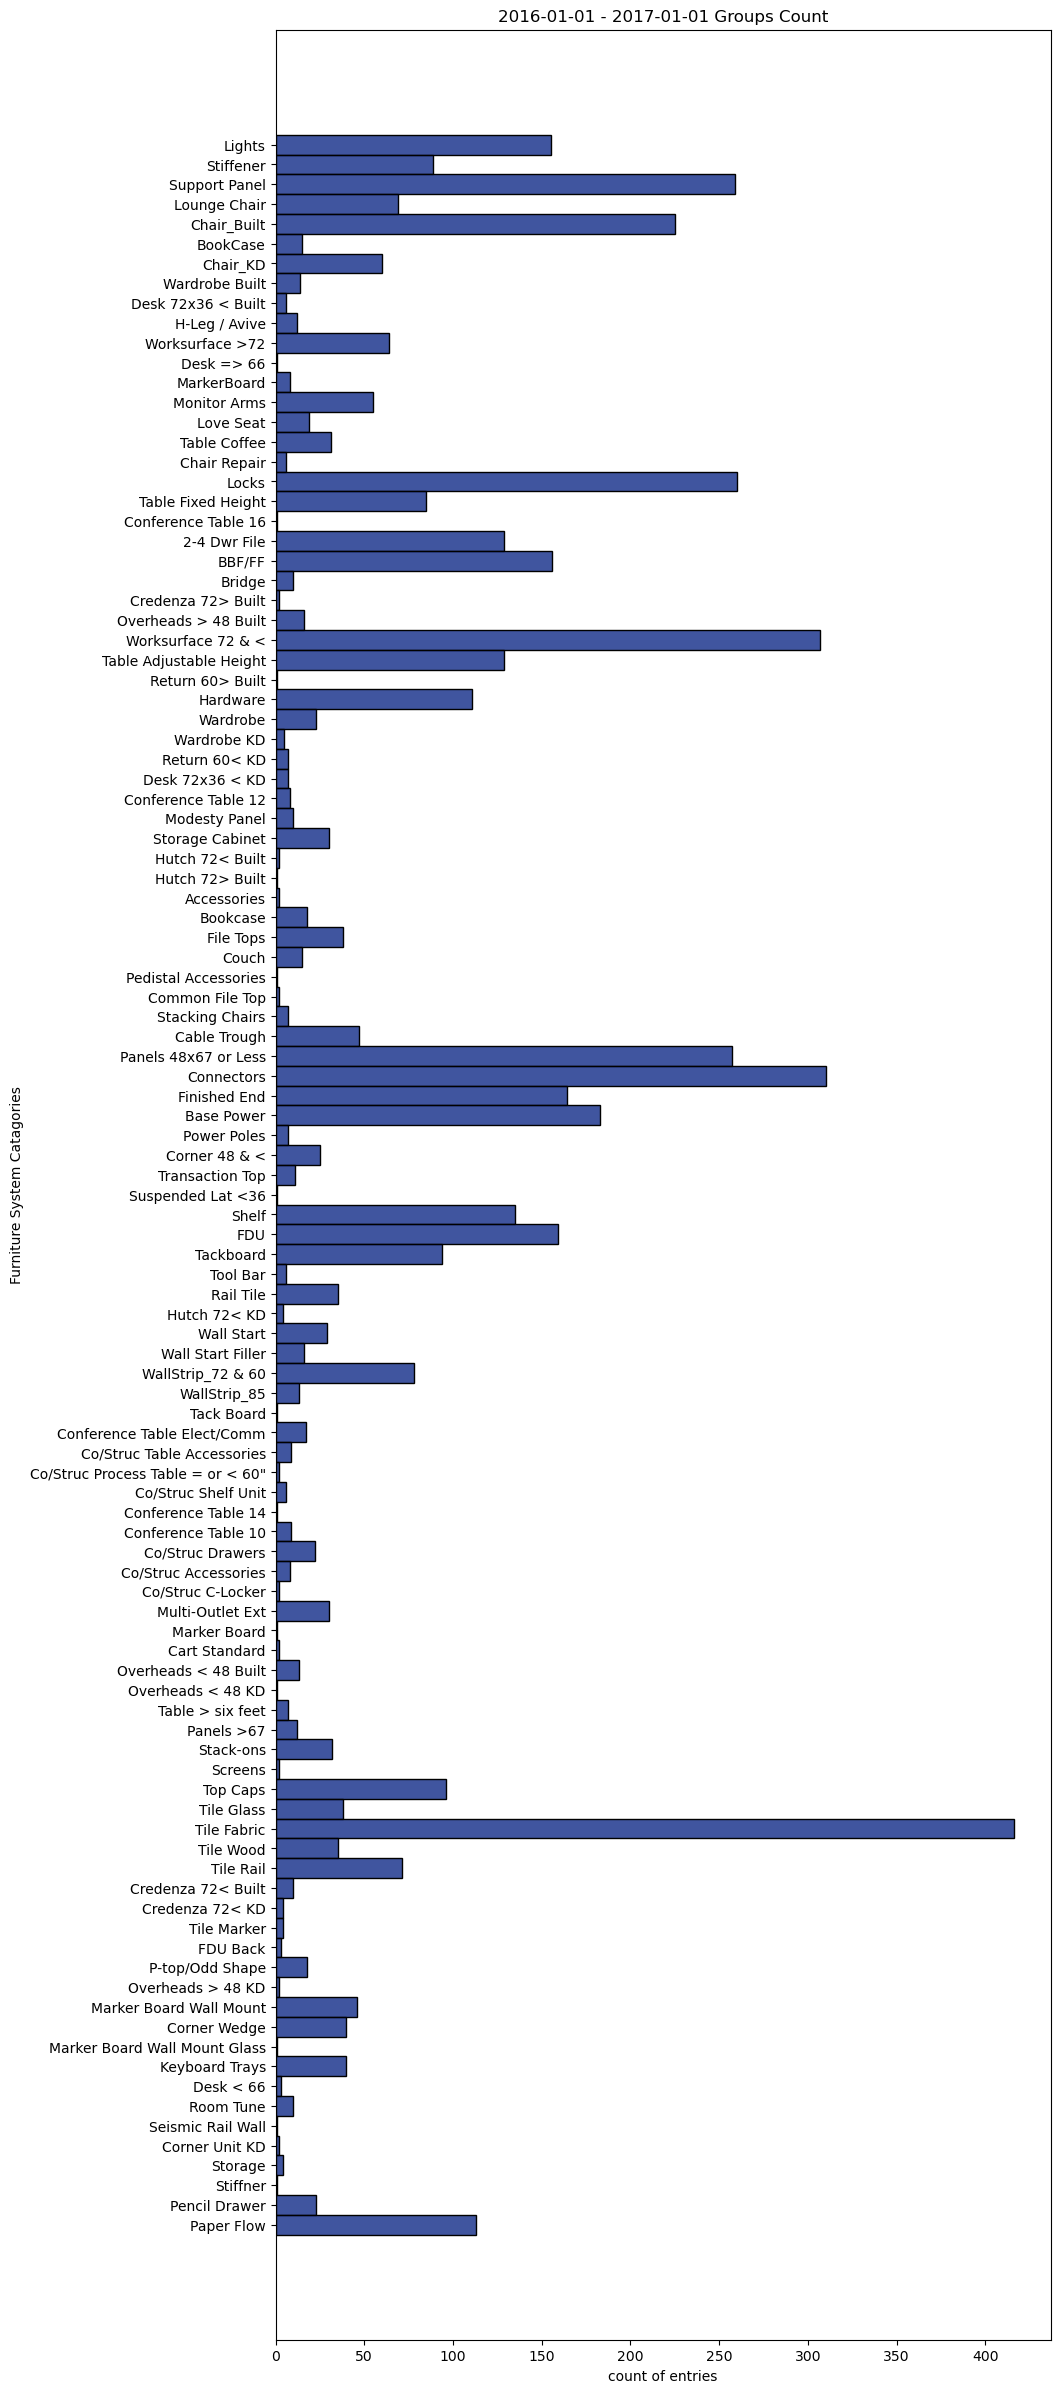

In [44]:
StartDate = '2016-01-01'
EndDate = '2017-01-01'
df2 = df1.loc[(df1['fldDate'] >= StartDate) & (df1['fldDate'] < EndDate)]
plt.figure(figsize = (10,30))
sns.histplot(y='fldOpsWorksheetID', data=df2)
plt.title(f'{StartDate} - {EndDate} Groups Count')
plt.ylabel('Furniture System Catagories')
plt.xlabel('count of entries')

#### The information shown below indicates that this is a Herman Miller Dealership. The supplimentry products that were place into the mix were Sit-on-it seating, Kimball Office furniture and National Office furniture.

Text(0.5, 0, 'count of Items Quoted')

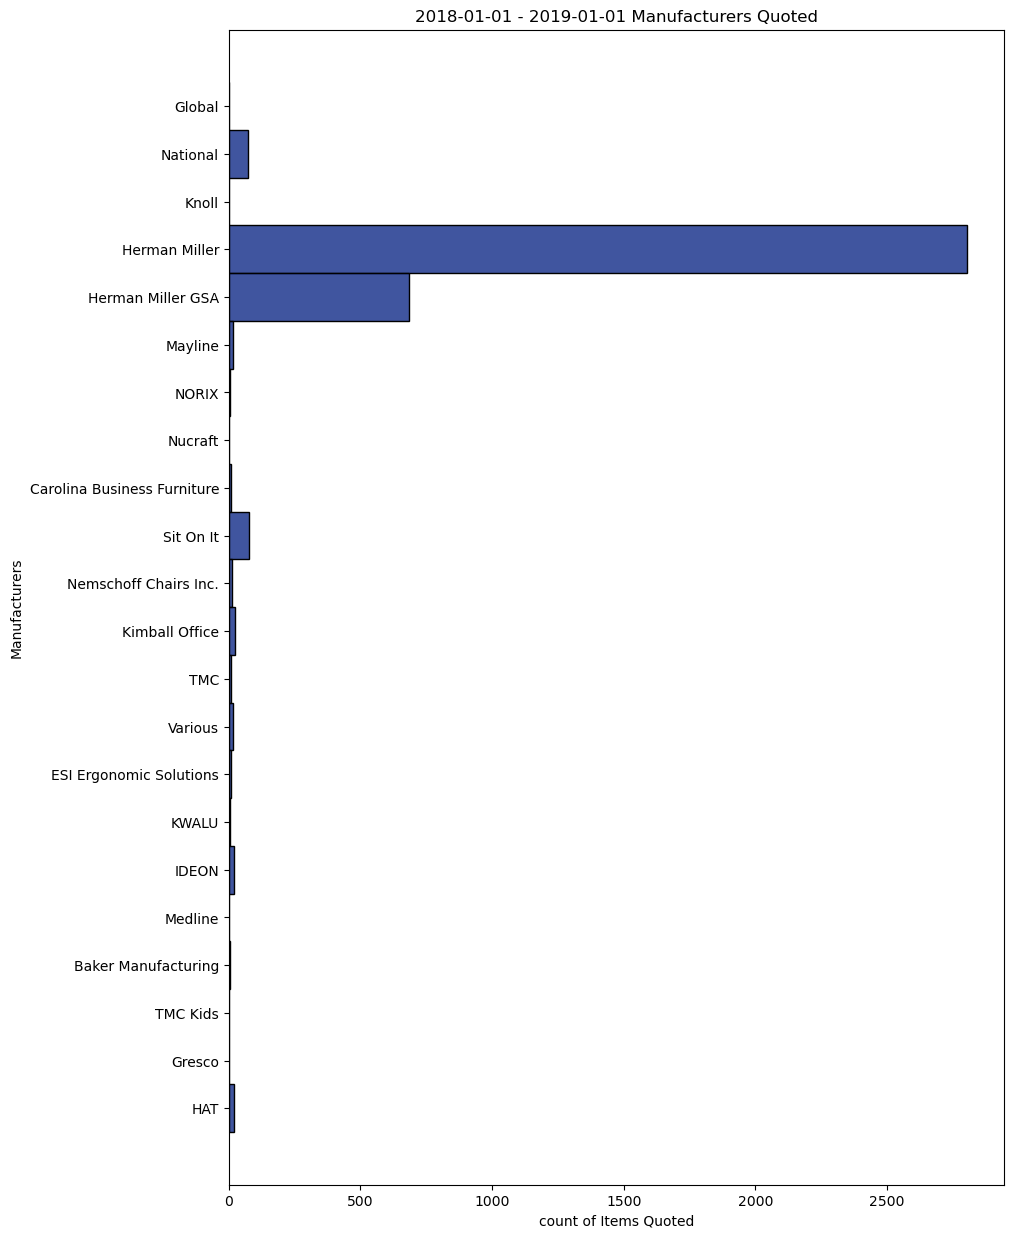

In [45]:
StartDate = '2018-01-01'
EndDate = '2019-01-01'
df2 = df1.loc[(df1['fldDate'] >= StartDate) & (df1['fldDate'] < EndDate)]

plt.figure(figsize = (10,15))
sns.histplot(y='fldManufacturer_ID', data=df2)
plt.title(f'{StartDate} - {EndDate} Manufacturers Quoted')
plt.ylabel('Manufacturers')
plt.xlabel('count of Items Quoted')

In [63]:
StartDate = '2016-01-01'
EndDate = '2017-01-01'
df2 = df1.loc[(df1['fldDate'] >= StartDate) & (df1['fldDate'] < EndDate)]
df_Filt = df2.filter(items=['fldManufacturer_ID', 'fldQuantity'])
df_Filt_y = df2.filter(items=['fldManufacturer_ID'])
df_Filt_x = df2.filter(items=['fldQuantity']).sum()
plt.figure(figsize = (10,15))
#sns.histplot(y='fldManufacturer_ID', data=df_Filt)
sns.barplot(data=df_Filt, x=df_Filt_x, y=df_Filt_y)
plt.title(f'{StartDate} - {EndDate} Manufacturers Quoted')
plt.ylabel('Manufacturers')
plt.xlabel('count of Items Quoted')

AttributeError: 'list' object has no attribute 'sum'

In [59]:
df_Filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219 entries, 3 to 34487
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fldManufacturer_ID  5218 non-null   object
 1   fldQuantity         5219 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.3+ KB
